In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
"""
Gabriel R. Schleder // gabriel.schleder@ufabc.edu.br

Bond flipping based on pair of atom index (the two atoms forming a bond).

Code for rotation of 2D points around a point by:
Lyle Scott, III  // lyle@ls3.io

Multiple ways to rotate a 2D point around the origin / a point.

Timer benchmark results @ https://gist.github.com/LyleScott/d17e9d314fbe6fc29767d8c5c029c362
"""
from __future__ import print_function

import math
import numpy as np
import matplotlib.pyplot as plt


def rotate_around_point_highperf(xy, radians, origin=(0, 0)):
    """Rotate a point around a given point.
    
    I call this the "high performance" version since we're caching some
    values that are needed >1 time. It's less readable than the previous
    function but it's faster.
    """
    x, y = xy
    offset_x, offset_y = origin
    adjusted_x = (x - offset_x)
    adjusted_y = (y - offset_y)
    cos_rad = math.cos(radians)
    sin_rad = math.sin(radians)
    qx = offset_x + cos_rad * adjusted_x + sin_rad * adjusted_y
    qy = offset_y + -sin_rad * adjusted_x + cos_rad * adjusted_y

    return qx, qy


def _main():
    theta = math.radians(90)
    point = (5, -11)

#     print(rotate_via_numpy(point, theta))
#     print(rotate_origin_only(point, theta))
#     print(rotate_around_point_lowperf(point, theta))
    print(rotate_around_point_highperf(point, theta))


if __name__ == '__main__':
    _main()


def bond_flip(a,b):
    """Flip bond based on indices of a pair of atoms a and b."""
    fig=plt.figure(figsize=(14,6))
    bond=[[(xy[a])[0],(xy[b])[0]],[(xy[a])[1],(xy[b])[1]]] #show original a-b bond
    plt.subplot(1, 2, 1)
    plt.gca().set_aspect('equal')
    plt.plot(bond[0],bond[1],'r-')
    plt.scatter(x,y) #original graphic, no flip, a e b with different color
    for i in a,b:
        plt.text(xy[i,0], xy[i,1], str(i))
    plt.title('Before flip')
    plt.tight_layout()
    
    origem=(xy[a]+xy[b])/2
    xy[a]=rotate_around_point_highperf(xy[a],math.radians(90),origem)
    xy[b]=rotate_around_point_highperf(xy[b],math.radians(90),origem)
    
    plt.subplot(1, 2, 2)
    plt.gca().set_aspect('equal')
    #fig=plt.figure()
    bond=[[(xy[a])[0],(xy[b])[0]],[(xy[a])[1],(xy[b])[1]]] #show flipped a-b bond
    plt.plot(bond[0],bond[1],'r-')
    for i in range(0,560,1):
        x[i]=(xy[i])[0]
        y[i]=(xy[i])[1]
    plt.scatter(x,y)
    for i in a,b:
        plt.text(xy[i,0], xy[i,1], str(i))
    plt.title('After flip')
    plt.tight_layout()

# aorig=xy[a]
# borig=xy[b]

#xy[a]=[aorig[0],aorig[1]-0.2] #temporary: two points 'triangular'-like instead of square lattice
#xy[b]=[borig[0],borig[1]+0.2]
#aorig=xy[a]
#borig=xy[b]

#####FLIP#####
# a1=xy[90-1] #defining a and b neighbors
# a2=xy[92-1]
# b1=xy[75-1]
# b2=xy[77-1]
# #print(a1)
# xy[a]=[((aorig[0]+b1[0])/2 + (borig[0]+a1[0])/2)/2 , ((aorig[1]+b1[1])/2 + (a1[1]+borig[1])/2) /2] #redefine a as middle point between a-b1 and b-a1 bonds
# xy[b]=[((borig[0]+a2[0])/2 + (aorig[0]+b2[0])/2)/2 , ((aorig[1]+b2[1])/2 + (a2[1]+borig[1])/2) /2] #redefine b ... b-a2 and a-b2
# #print(xy[b])

def save_poscar(filename):
    """Save current coordinates to poscar file. Filename argument is the name of the file to be saved."""
    file = open(filename,'w')
    head = r"""Flip POSCAR
    1.0
          122.0000000000         0.0000000000         0.0000000000
            0.0000000000        64.8653030396         0.0000000000
            0.0000000000         0.0000000000        15.0000000000
       Bi
      560
    Cartesian"""
    print(head,file=file)
    for i in range(0,560,1):
        print('{:10.8f} {:10.8f} {:10.8f}'.format(float(x[i]),float(y[i]),float('0.5')),file = file) #print the new coordinates list

(-11.0, -5.000000000000001)


<IPython.core.display.Javascript object>


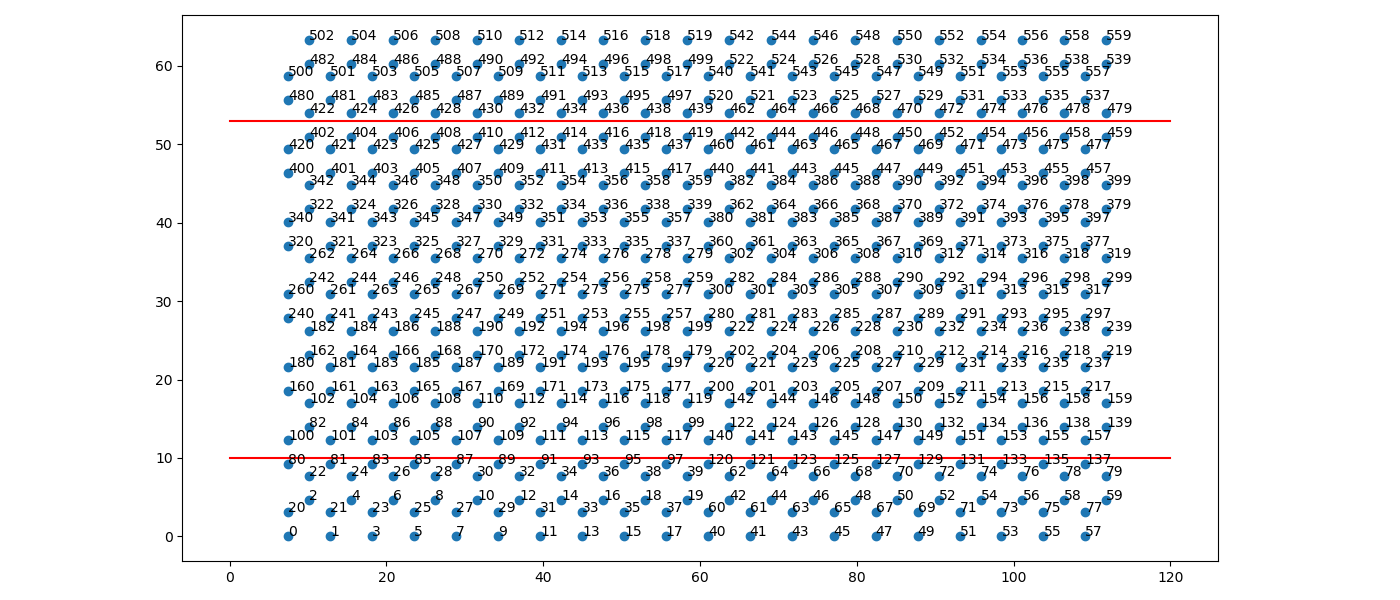

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from random import *

%matplotlib notebook
fig=plt.figure(figsize=(14,6))
plt.gca().set_aspect('equal')

#print(randint(1, 112))    # Pick a random number between 1 and 112

xy=np.zeros((560,2),dtype="float32")
xy = [(x,y) for x in range(0,560,1) for y in range(0,560,1)]
xy=np.genfromtxt(r'7_Bi.vasp',usecols = (0, 2),skip_header=8)
#xy=list(xy)
x=np.zeros((560,1),dtype="float32")
y=np.zeros((560,1),dtype="float32")

for i in range(0,560,1):
    x[i]=(xy[i])[0]
    y[i]=(xy[i])[1]
    #print('{:10.6f} {:10.6f} {:10.6f}'.format(float(x[i]),float(y[i]),float('0.5')))
#print(xy)

plt.scatter(x,y) #original graphic, no flip, a e b with different color
for i in range(0,560,1):
    plt.text(xy[i,0], xy[i,1], str(i))
plt.tight_layout()
plt.plot([0,120],[10,10],'r-') #region not to be flipped
plt.plot([0,120],[53,53],'r-')

In [4]:
save_poscar('0_pristine.vasp')

### We will flip bonds from the region between the red lines.
### Using approximately the same distribution as in Nano Lett. 2019, 19, 12, 8941-8946: 1 bond flip per 20 atoms = 5 %
Therefore, we have 460 atoms in the flip region, so we will perform 23 bond flips, and save the poscar every 5 flips

<IPython.core.display.Javascript object>


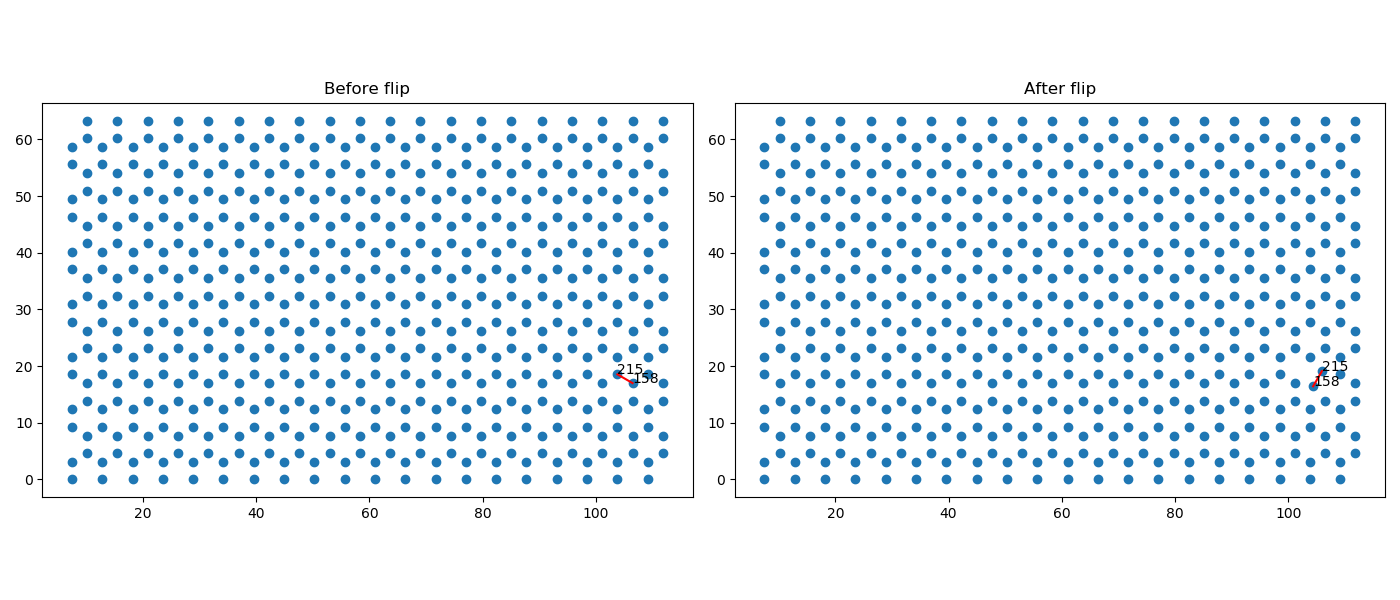

<IPython.core.display.Javascript object>


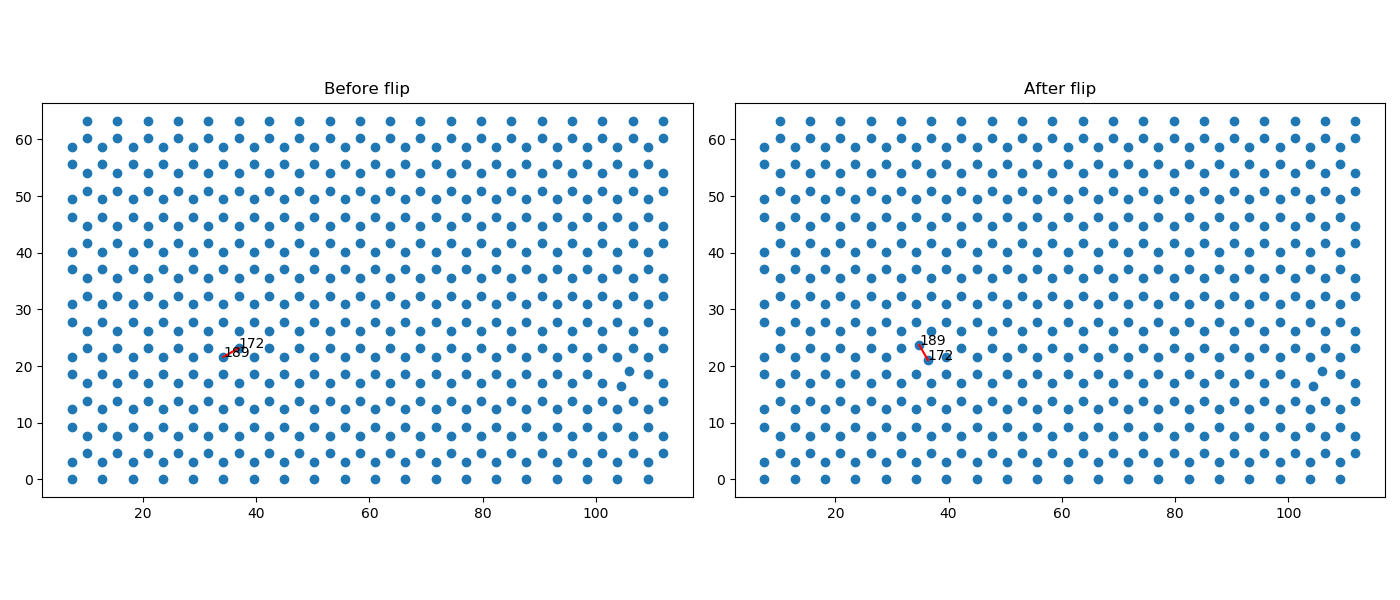

<IPython.core.display.Javascript object>


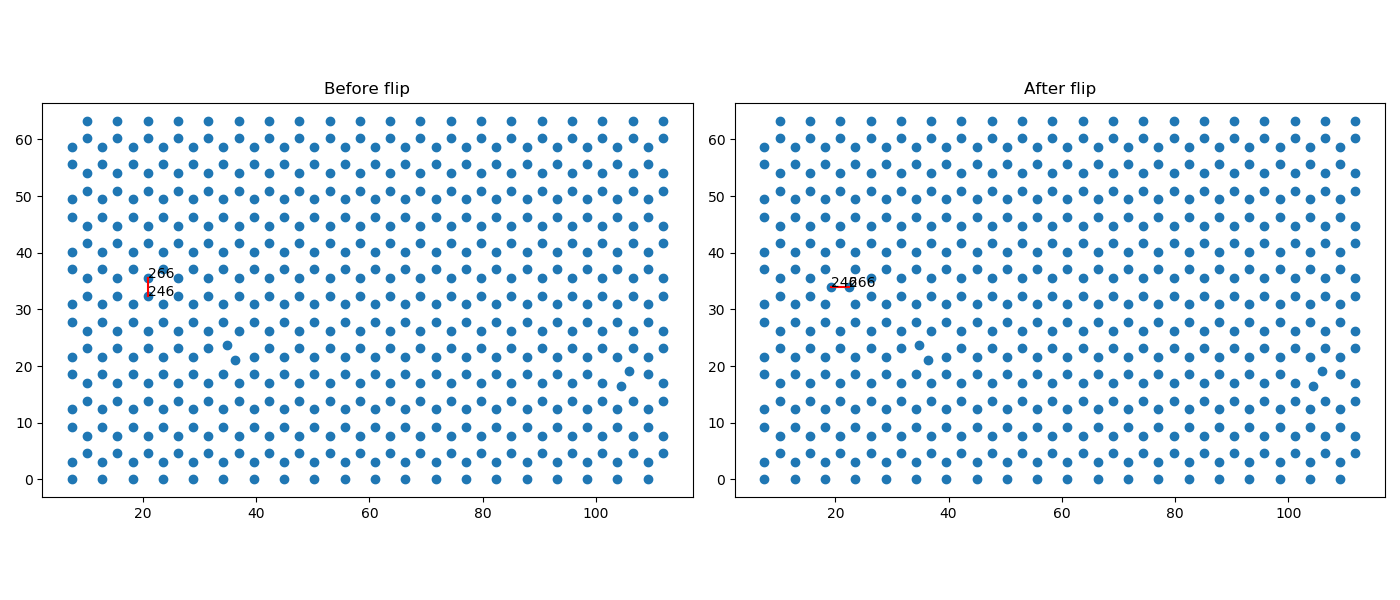

<IPython.core.display.Javascript object>


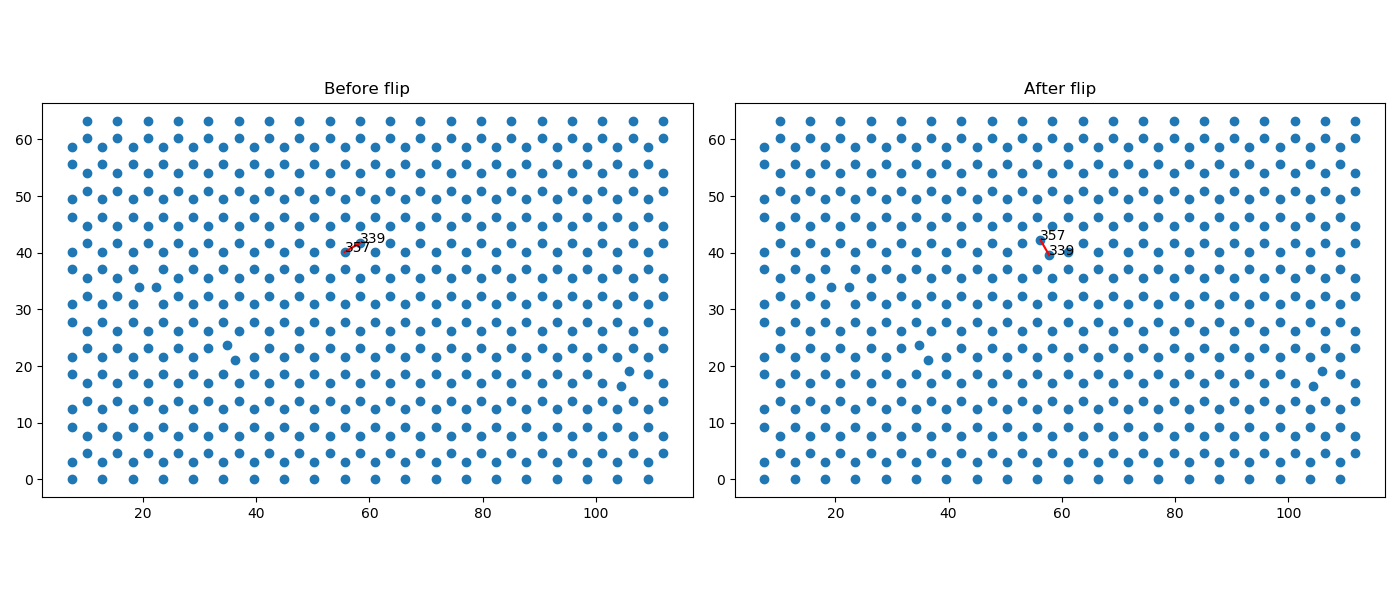

<IPython.core.display.Javascript object>


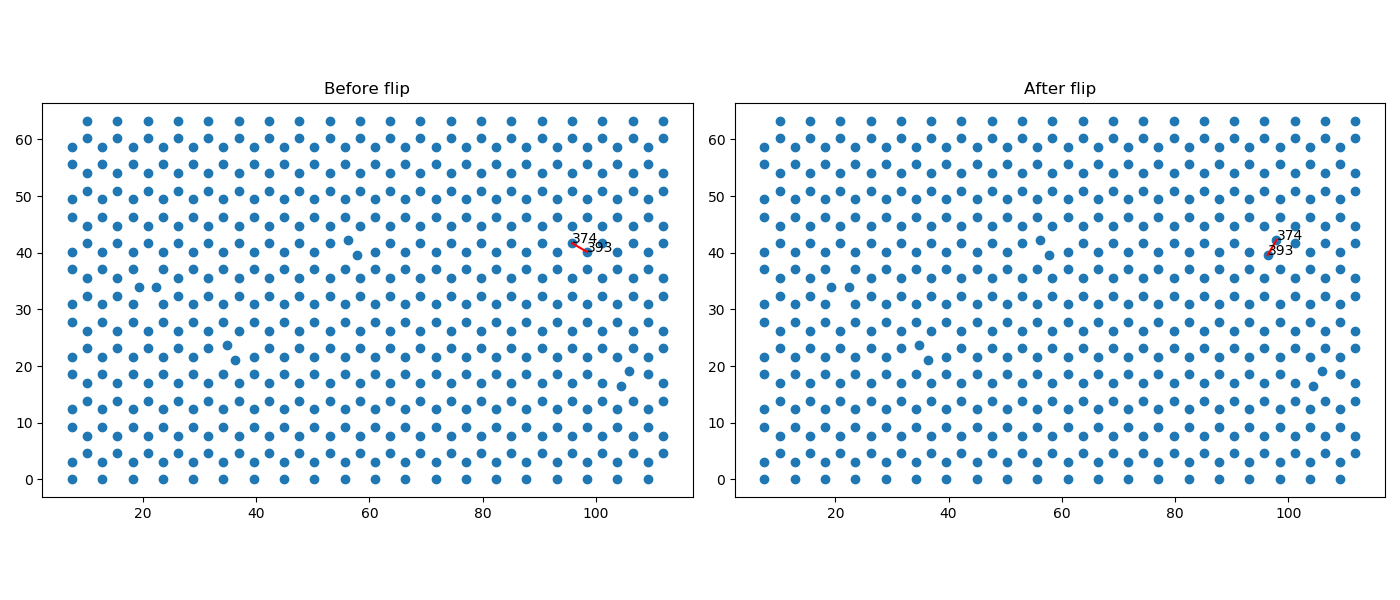

In [5]:
bond_flip(158,215)
bond_flip(172,189)
bond_flip(246,266)
bond_flip(339,357)
bond_flip(374,393)

In [6]:
save_poscar('5_steps.vasp')

<IPython.core.display.Javascript object>


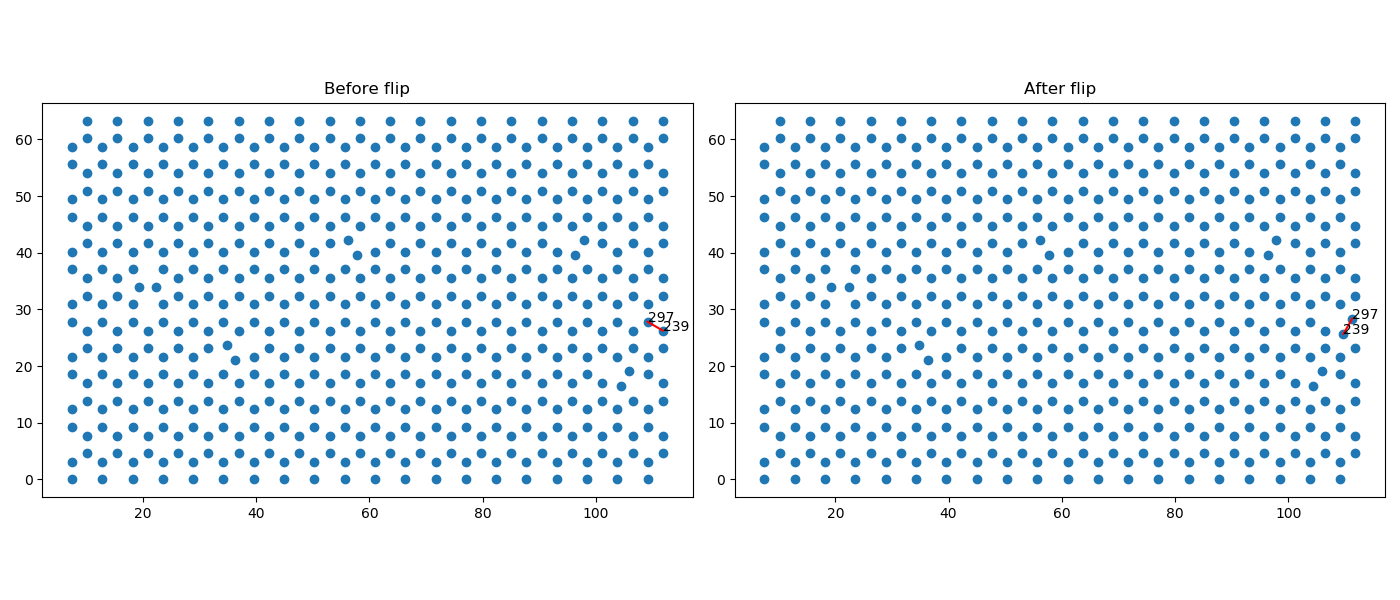

<IPython.core.display.Javascript object>


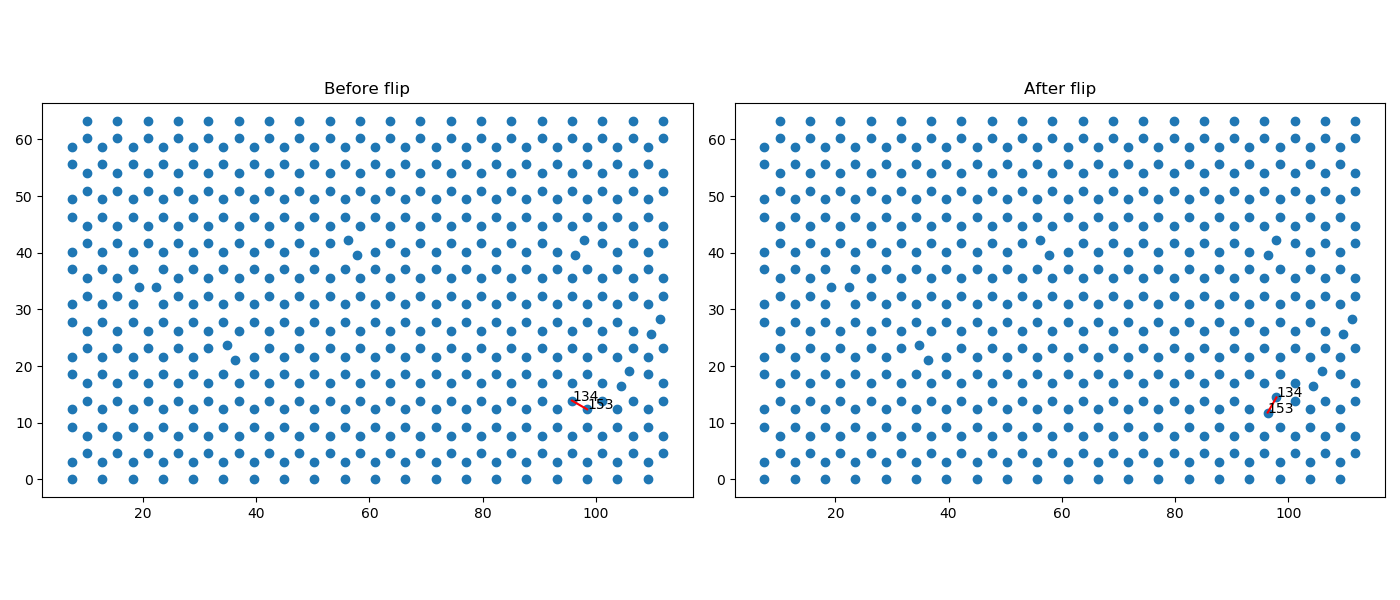

<IPython.core.display.Javascript object>


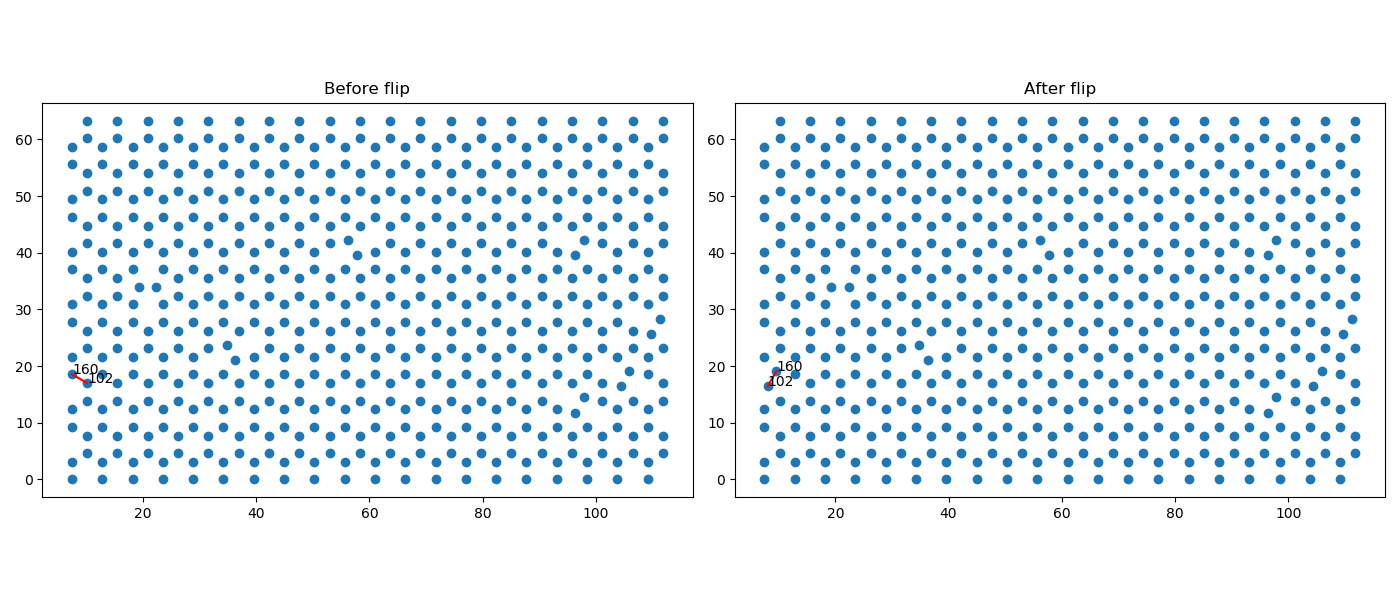

<IPython.core.display.Javascript object>


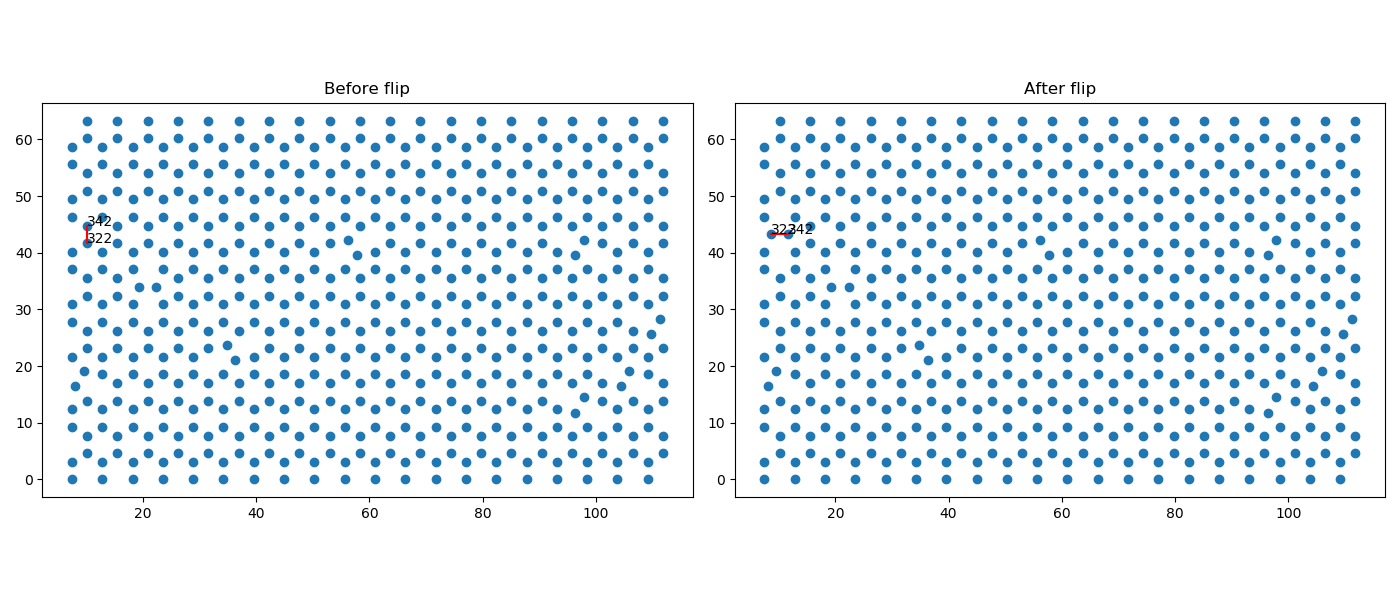

<IPython.core.display.Javascript object>


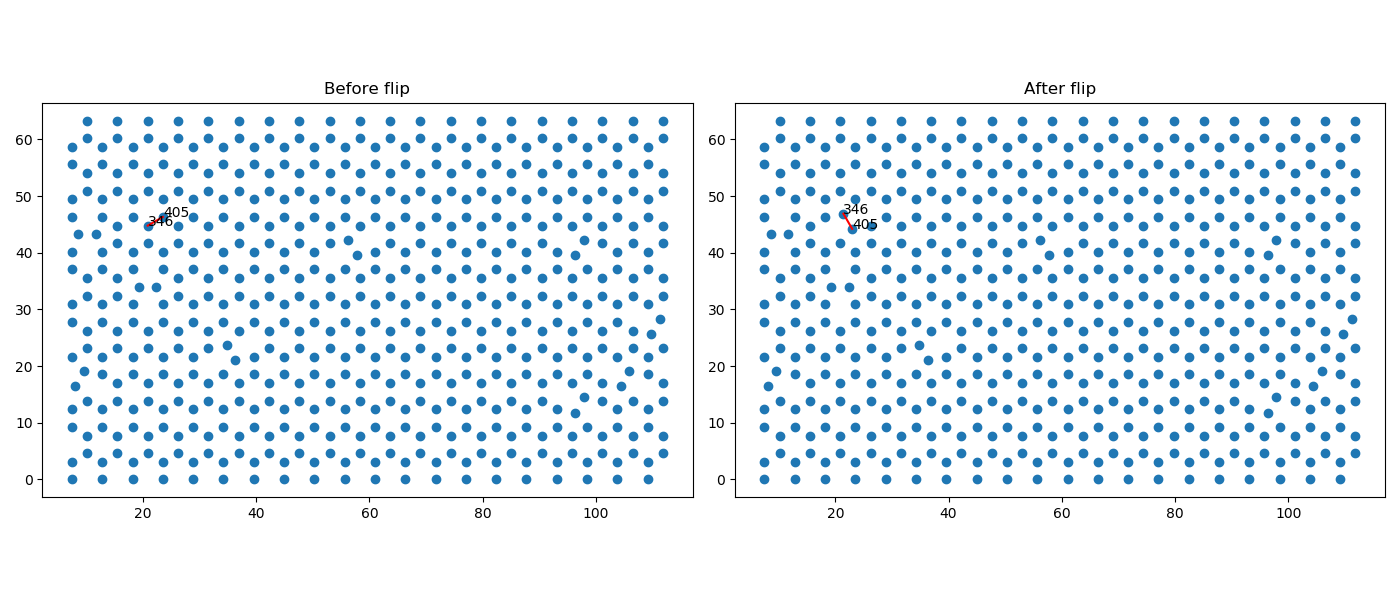

In [7]:
bond_flip(239,297)
bond_flip(134,153)
bond_flip(102,160)
bond_flip(322,342)
bond_flip(346,405)

In [8]:
save_poscar('10_steps.vasp')

<IPython.core.display.Javascript object>


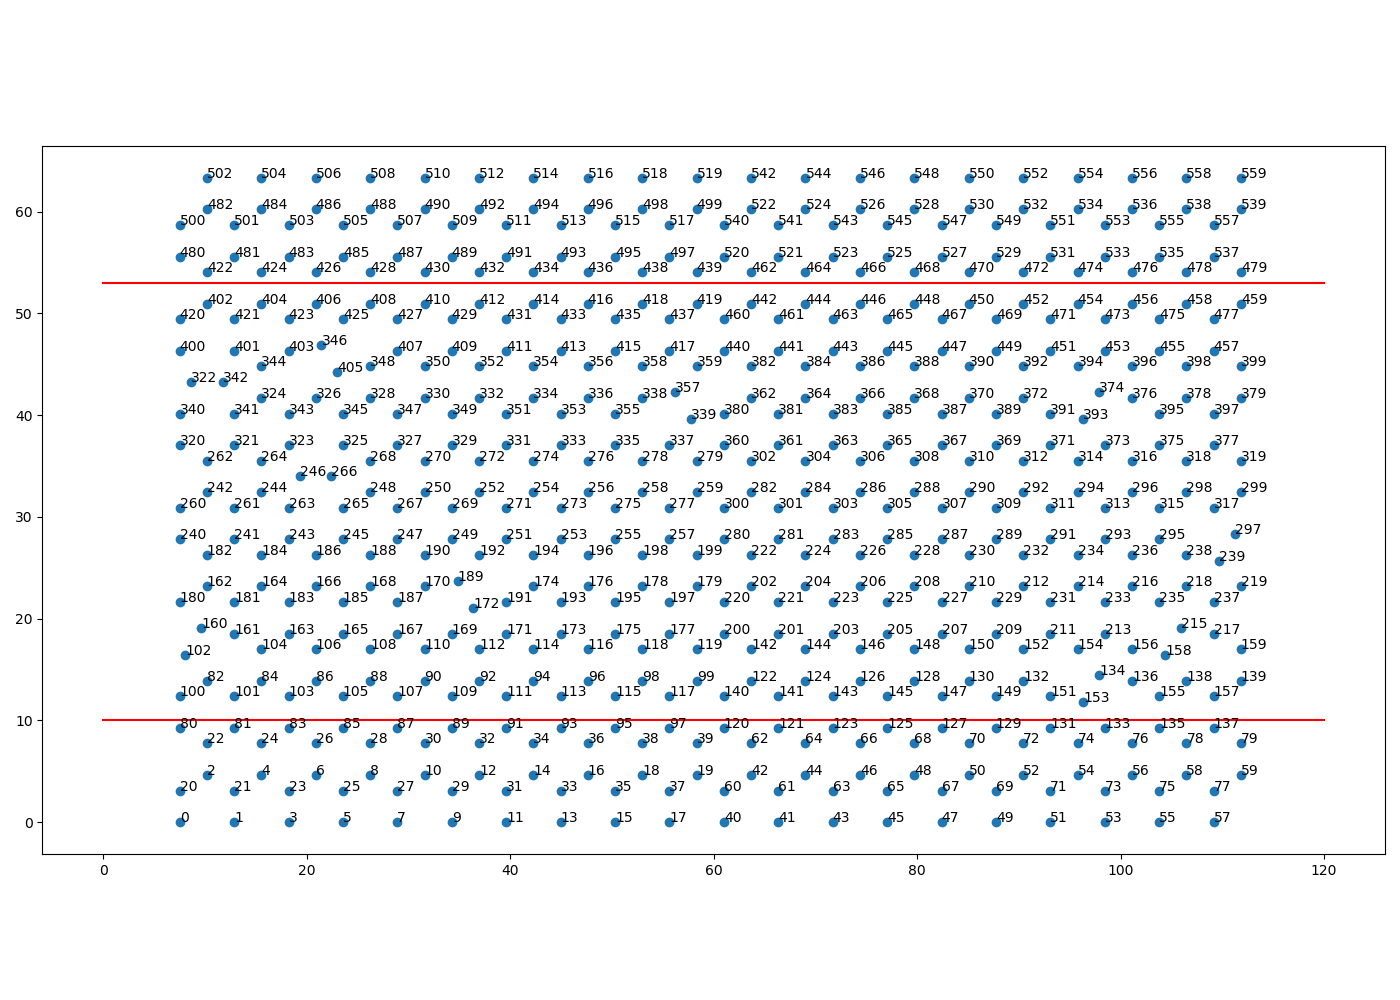

In [9]:
fig=plt.figure(figsize=(14,10))
plt.gca().set_aspect('equal')

for i in range(0,560,1):
    x[i]=(xy[i])[0]
    y[i]=(xy[i])[1]
plt.scatter(x,y)
for i in range(0,560,1):
    plt.text(xy[i,0], xy[i,1], str(i))
plt.tight_layout()
plt.plot([0,120],[10,10],'r-') #region not to be flipped
plt.plot([0,120],[53,53],'r-')

<IPython.core.display.Javascript object>


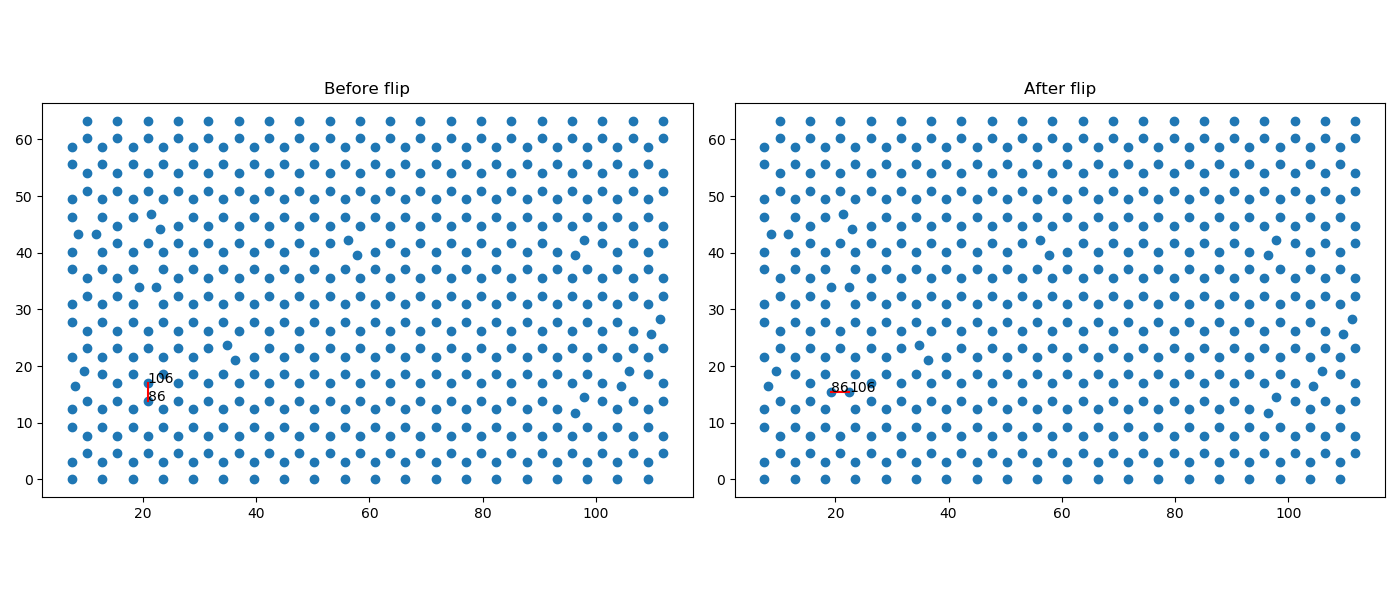

<IPython.core.display.Javascript object>


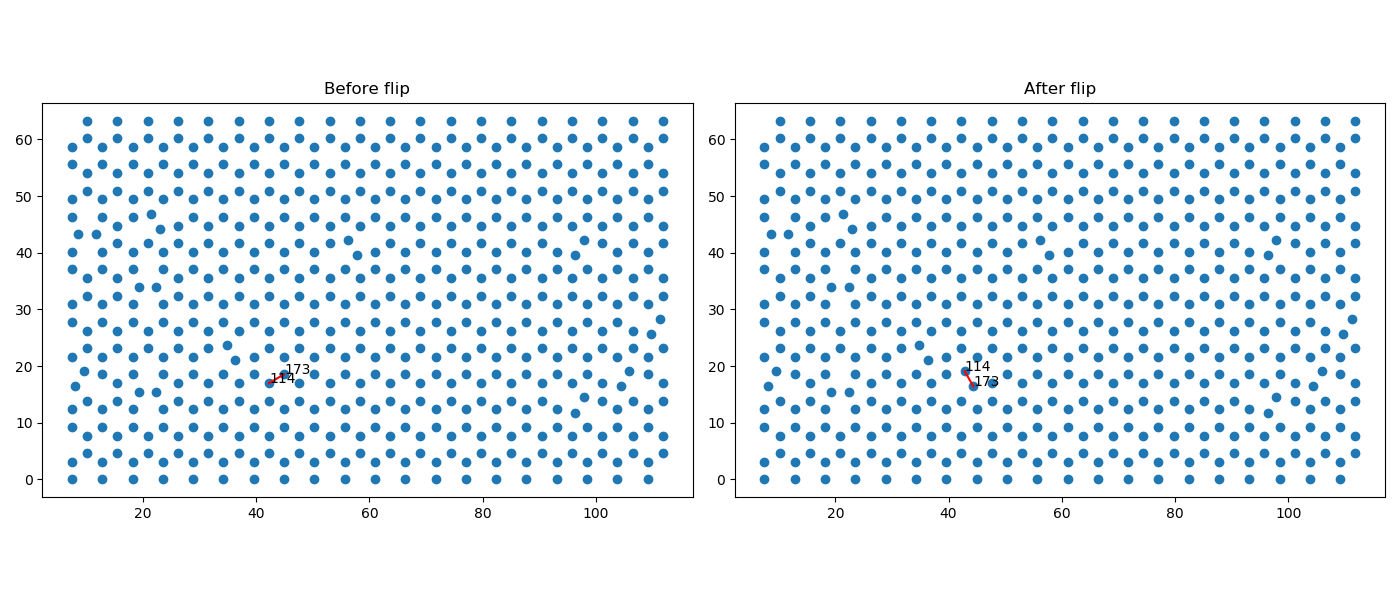

<IPython.core.display.Javascript object>


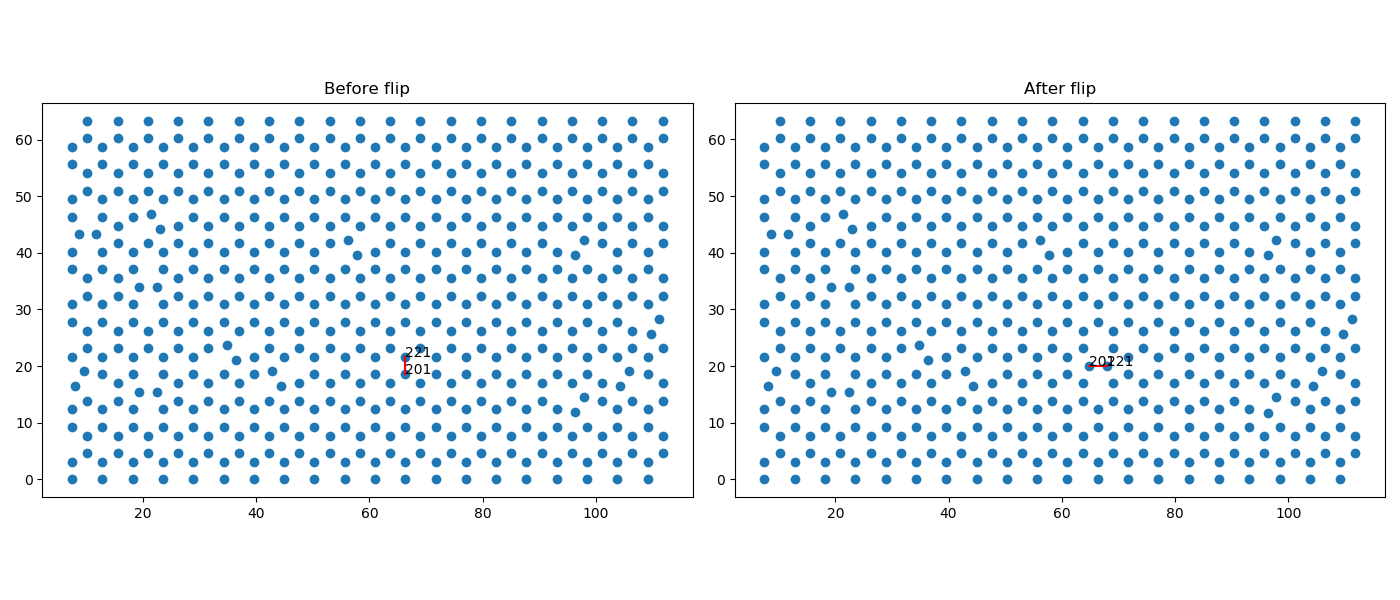

<IPython.core.display.Javascript object>


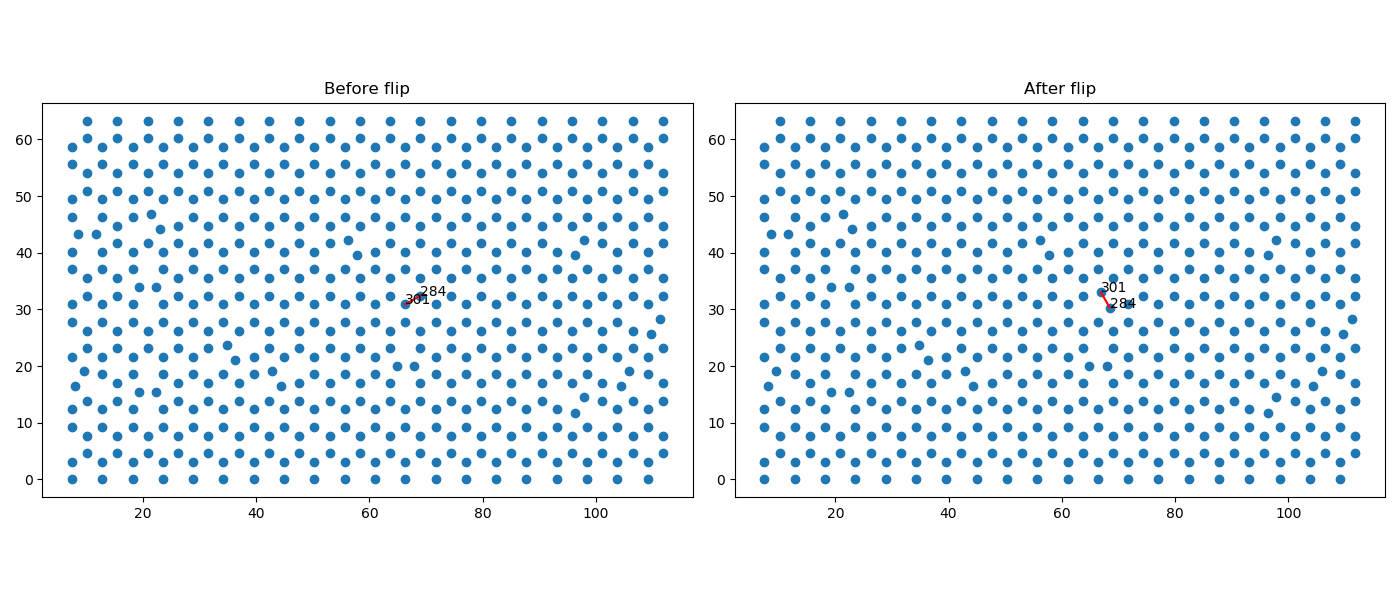

<IPython.core.display.Javascript object>


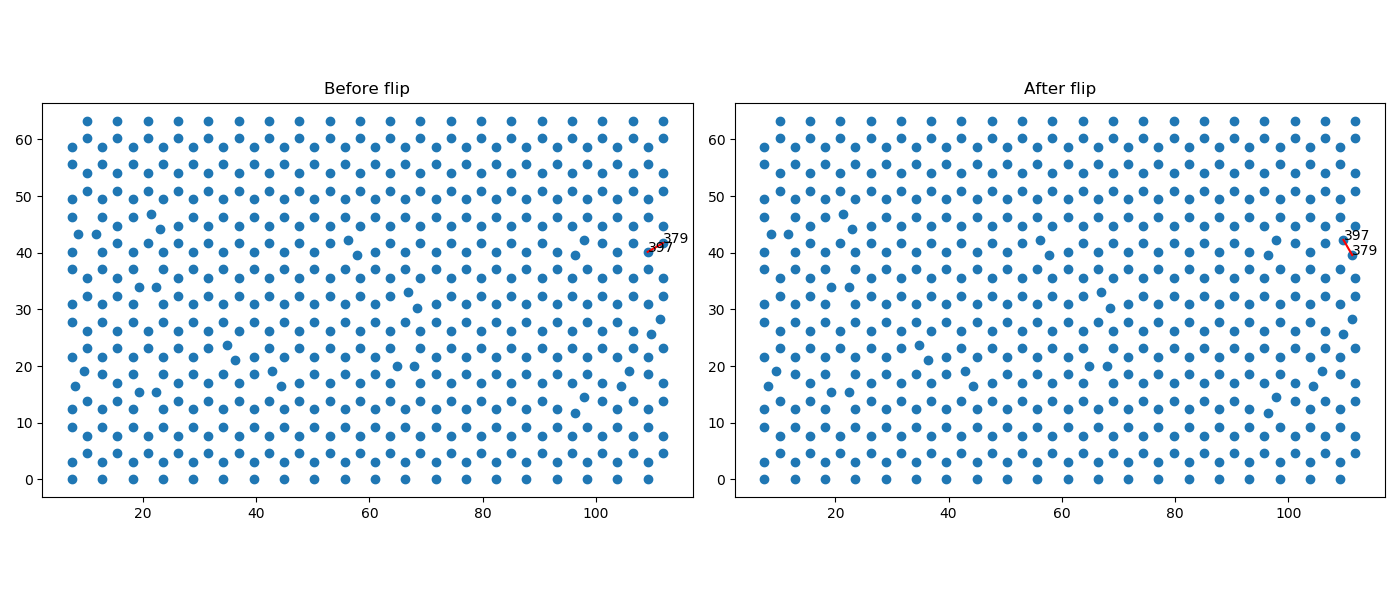

In [10]:
bond_flip(86,106)
bond_flip(114,173)
bond_flip(201,221)
bond_flip(284,301)
bond_flip(379,397)

In [11]:
save_poscar('15_steps.vasp')

<IPython.core.display.Javascript object>


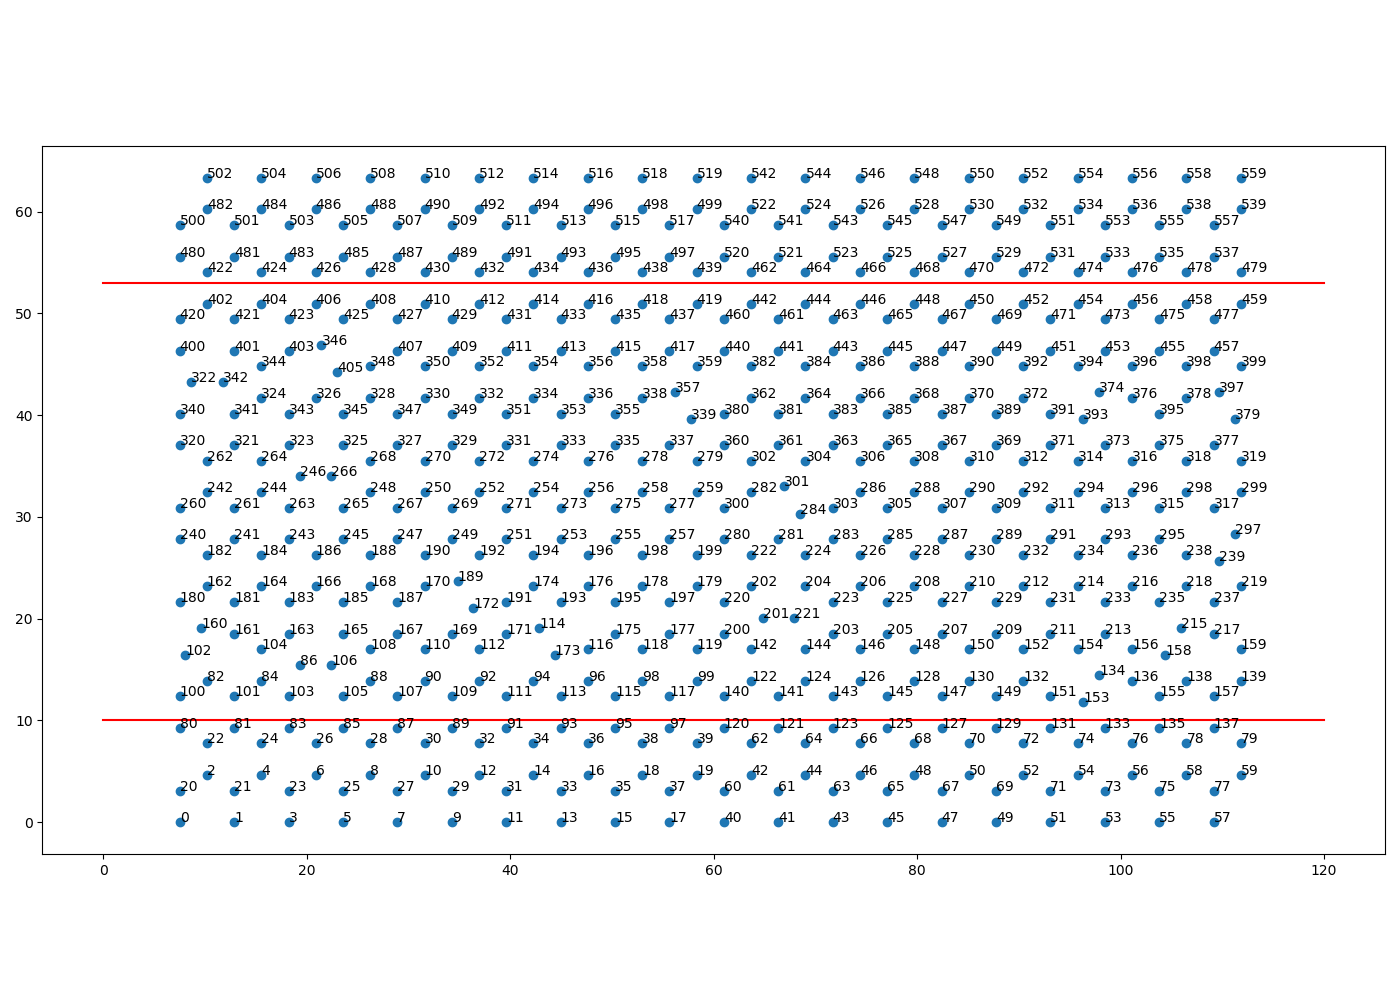

In [12]:
fig=plt.figure(figsize=(14,10))
plt.gca().set_aspect('equal')

for i in range(0,560,1):
    x[i]=(xy[i])[0]
    y[i]=(xy[i])[1]
plt.scatter(x,y)
for i in range(0,560,1):
    plt.text(xy[i,0], xy[i,1], str(i))
plt.tight_layout()
plt.plot([0,120],[10,10],'r-') #region not to be flipped
plt.plot([0,120],[53,53],'r-')

<IPython.core.display.Javascript object>


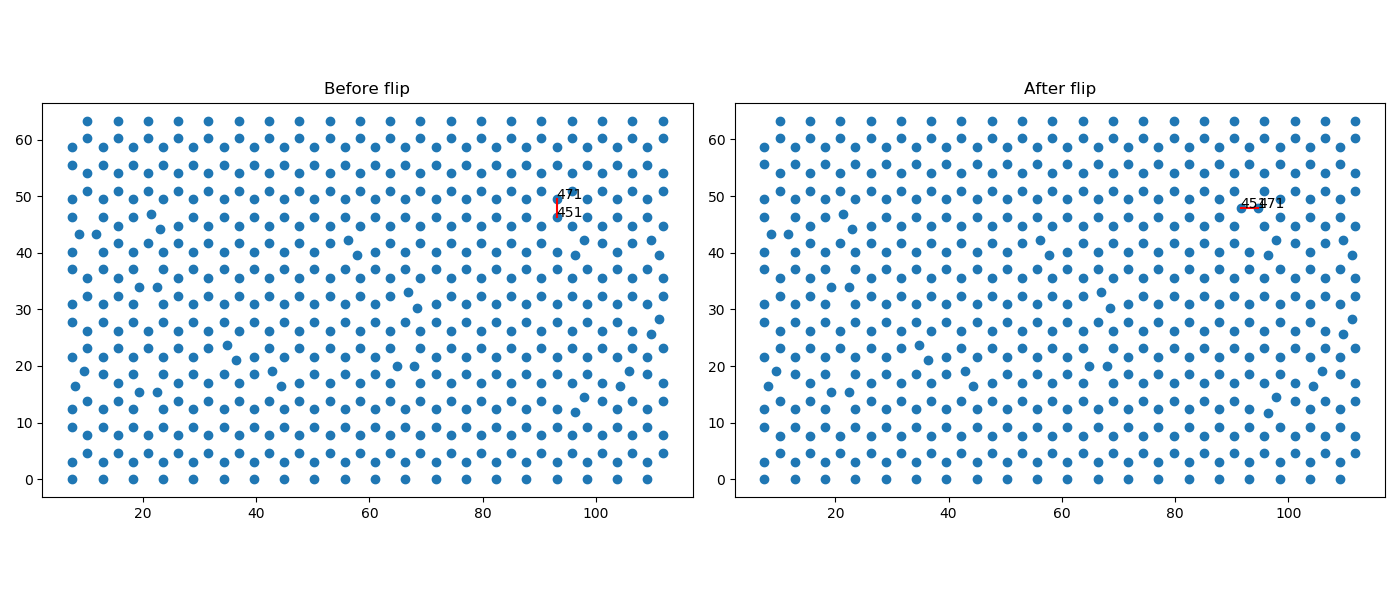

<IPython.core.display.Javascript object>


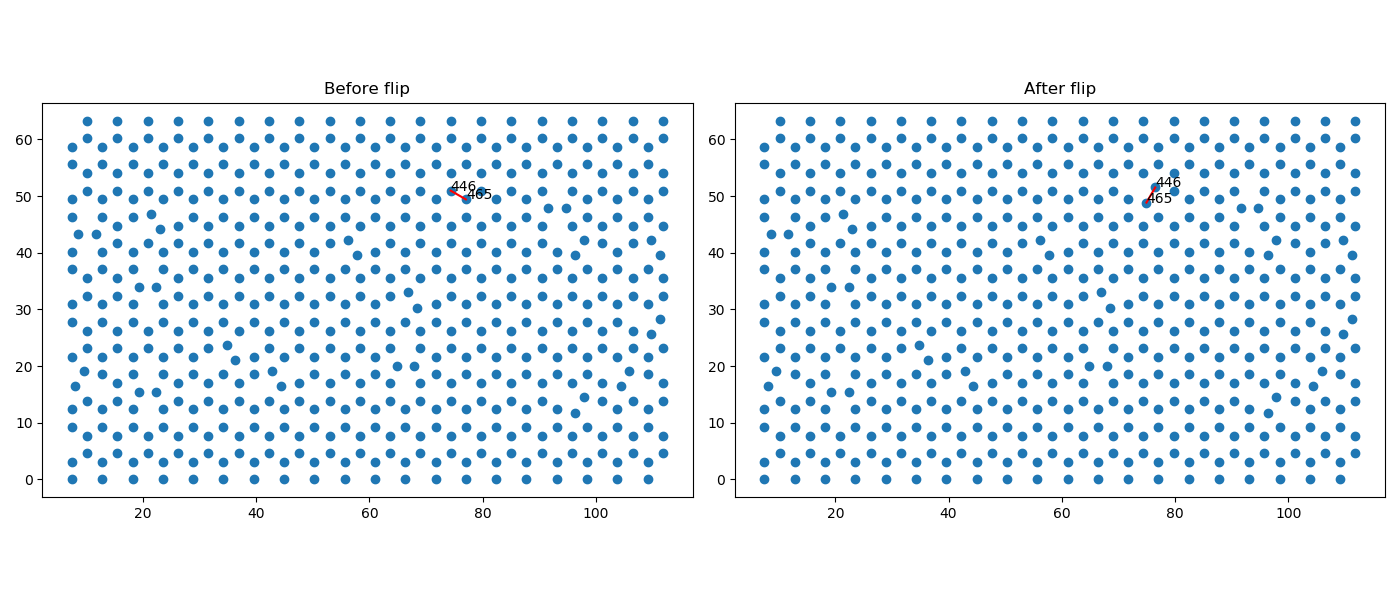

/home/gabrielschleder/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


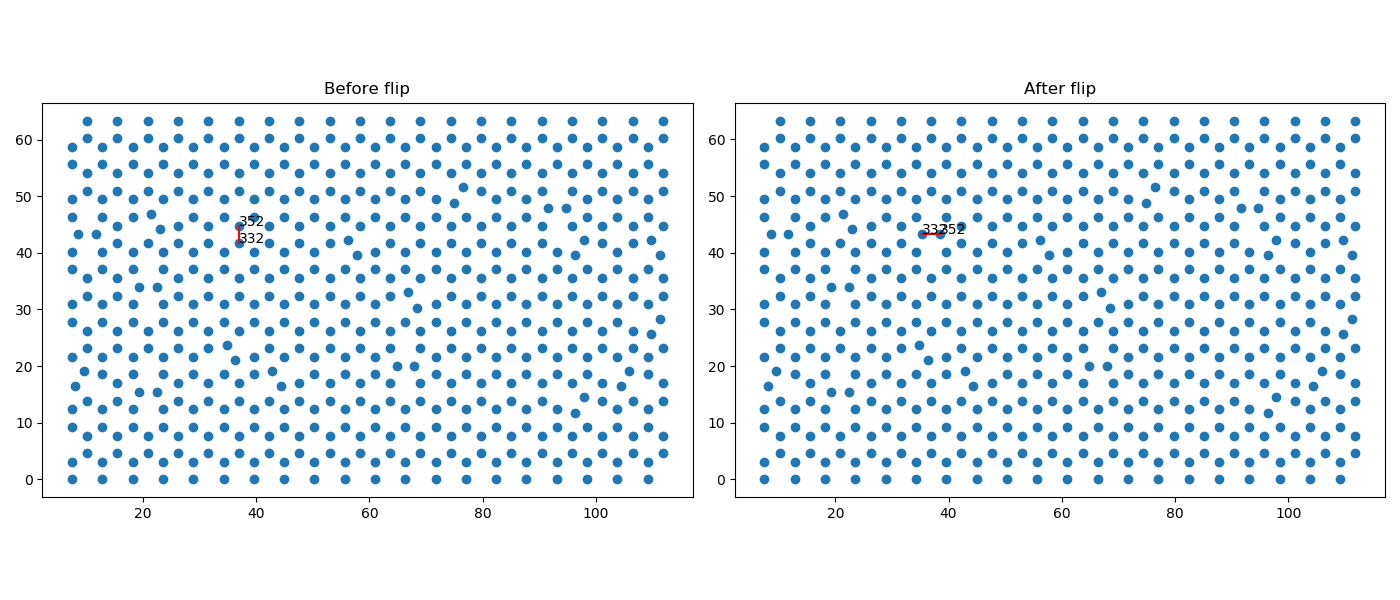

<IPython.core.display.Javascript object>


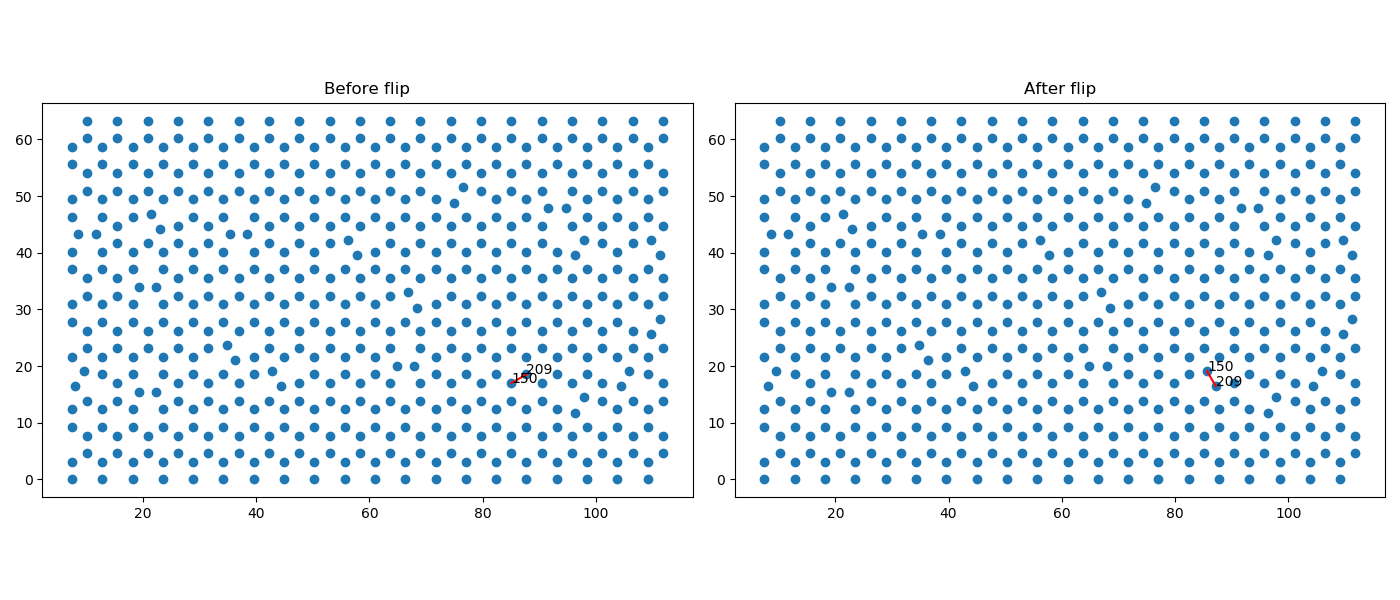

<IPython.core.display.Javascript object>


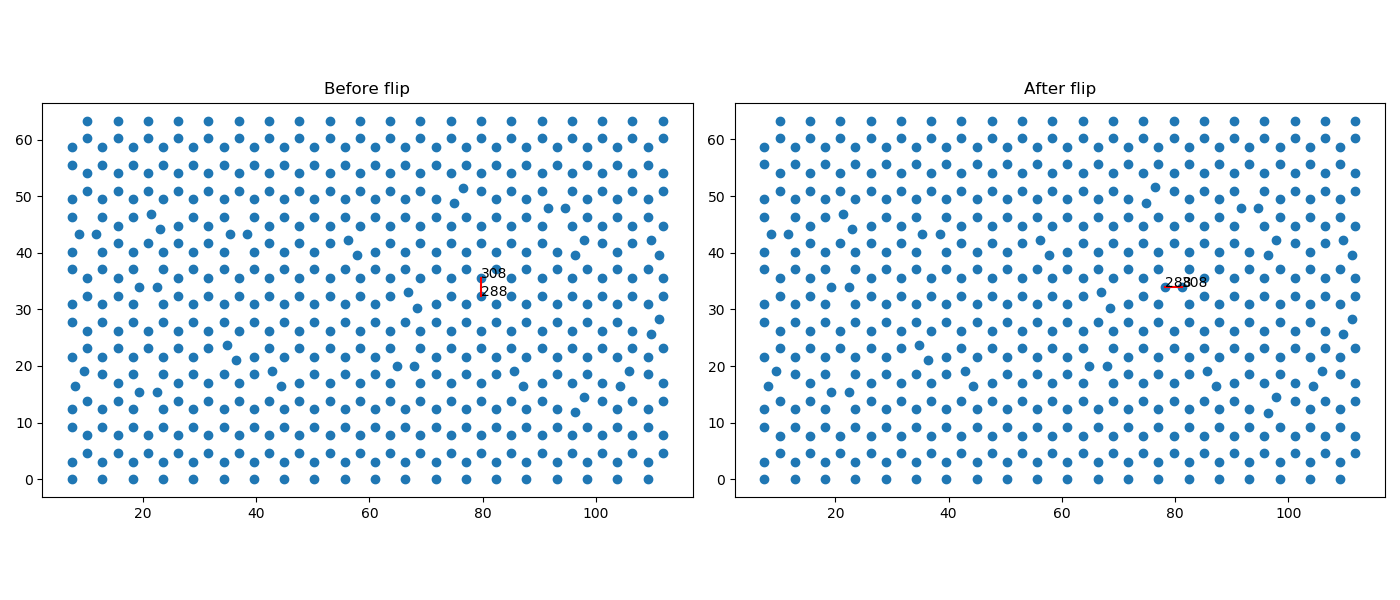

In [13]:
bond_flip(451,471)
bond_flip(446,465)
bond_flip(332,352)
bond_flip(150,209)
bond_flip(288,308)

In [14]:
save_poscar('20_steps.vasp')

/home/gabrielschleder/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


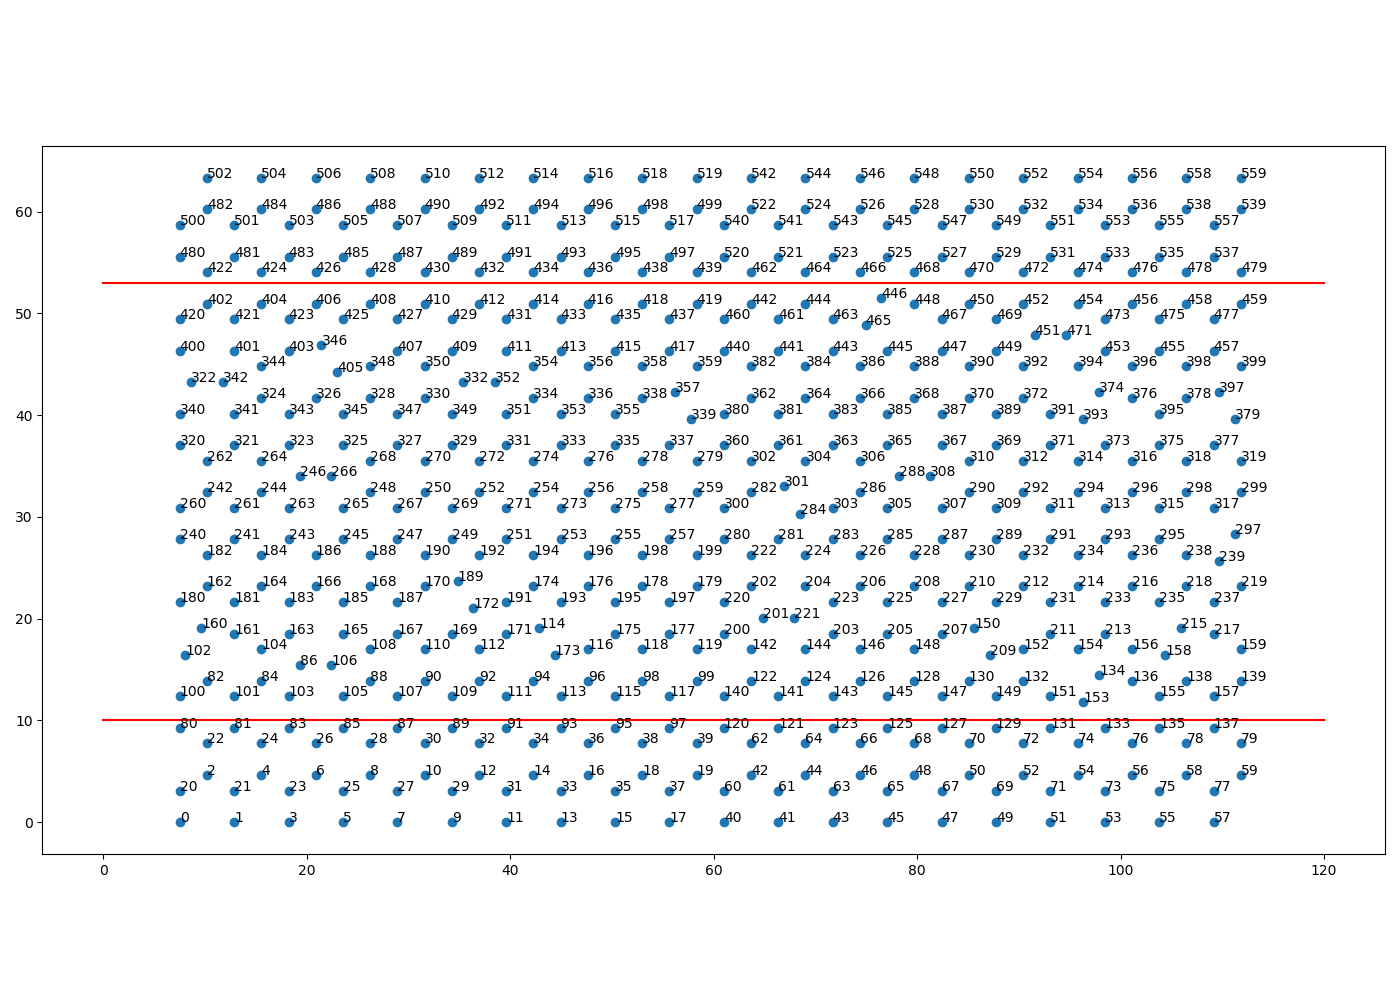

In [15]:
fig=plt.figure(figsize=(14,10))
plt.gca().set_aspect('equal')

for i in range(0,560,1):
    x[i]=(xy[i])[0]
    y[i]=(xy[i])[1]
plt.scatter(x,y)
for i in range(0,560,1):
    plt.text(xy[i,0], xy[i,1], str(i))
plt.tight_layout()
plt.plot([0,120],[10,10],'r-') #region not to be flipped
plt.plot([0,120],[53,53],'r-')

/home/gabrielschleder/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


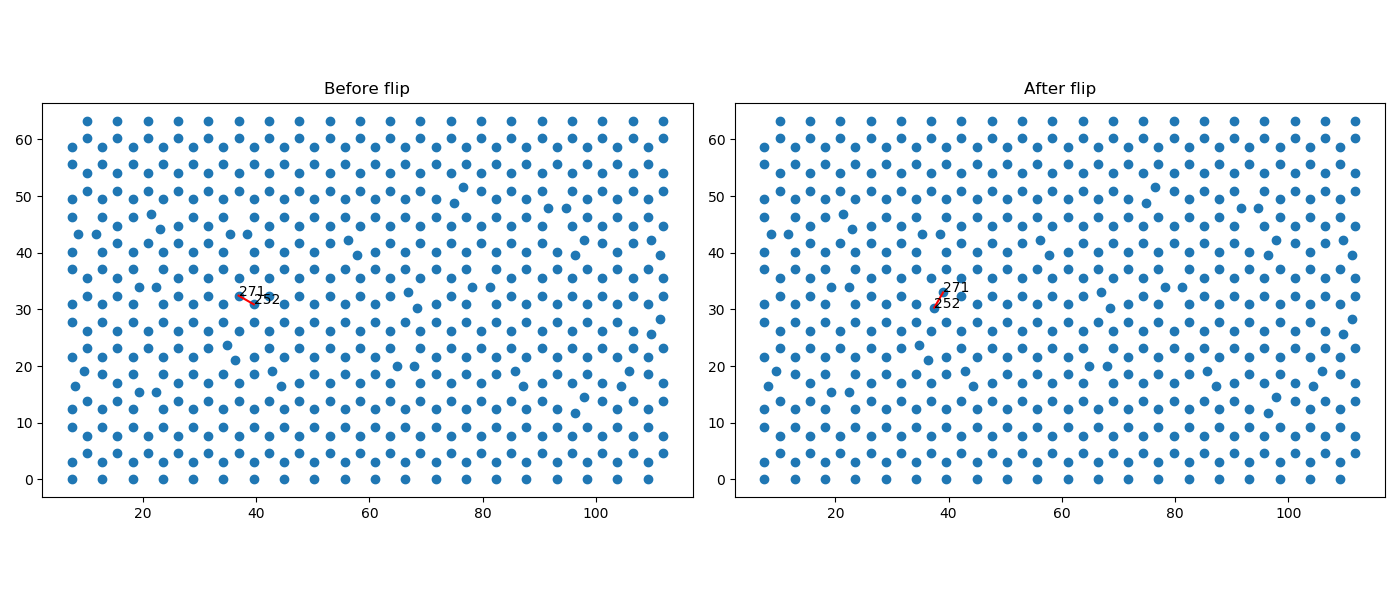

<IPython.core.display.Javascript object>


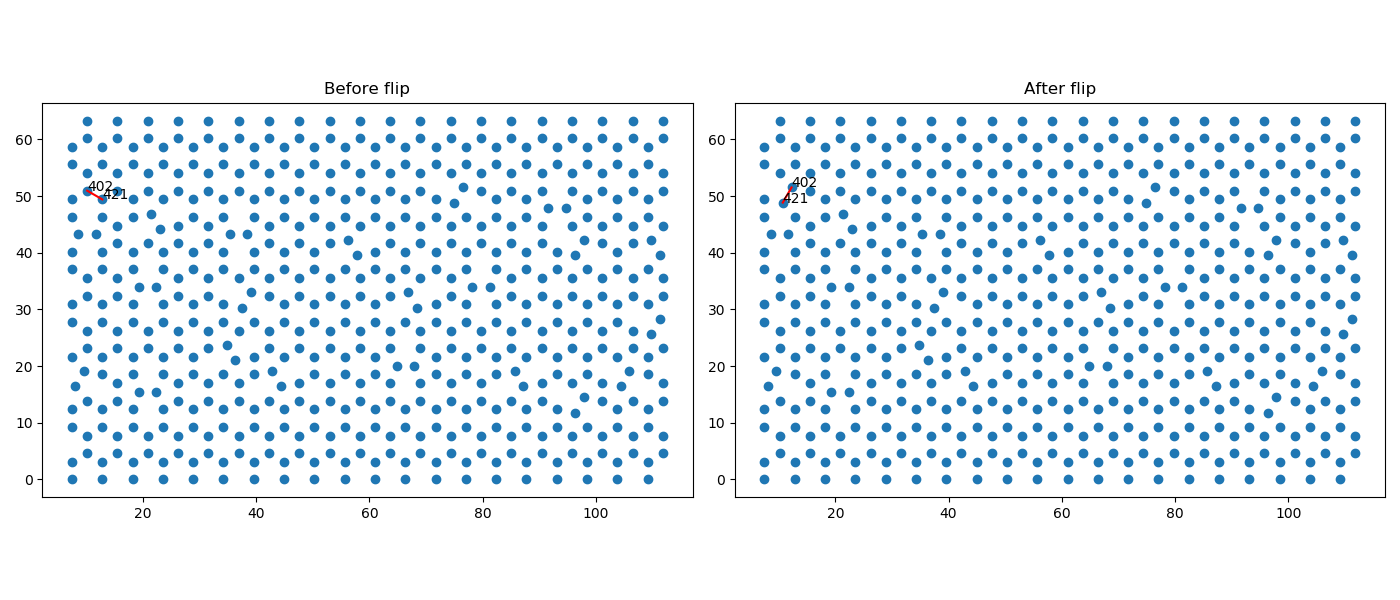

<IPython.core.display.Javascript object>


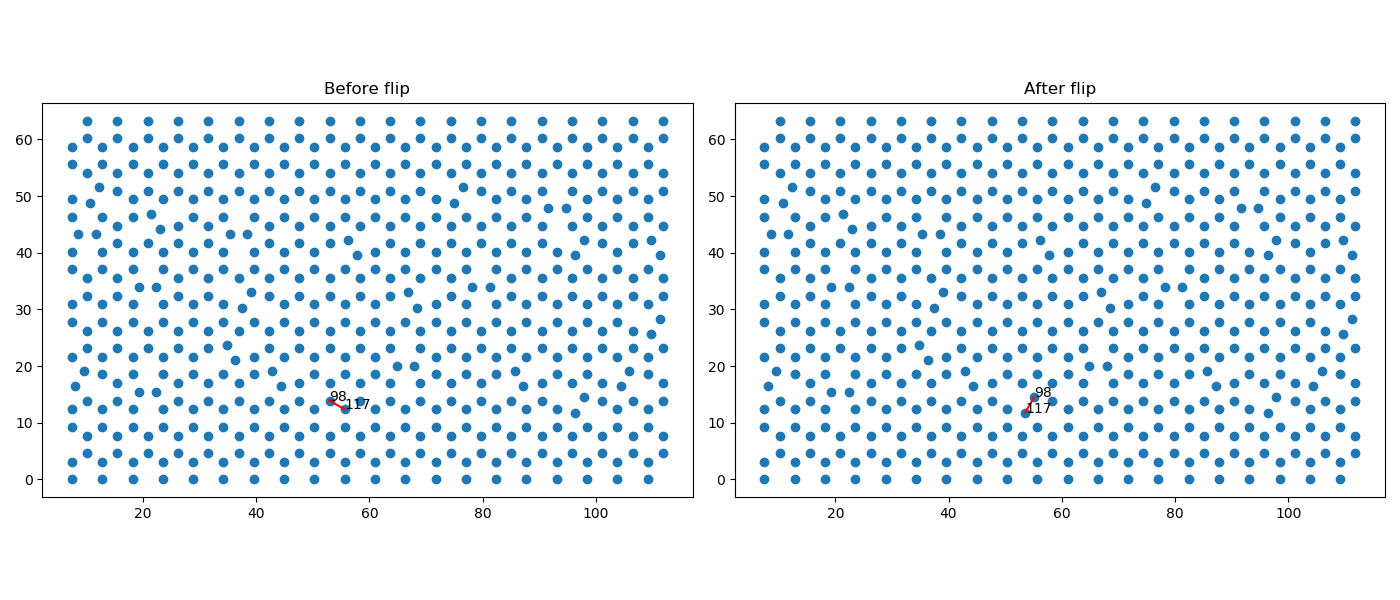

In [18]:
bond_flip(252,271)
bond_flip(402,421)
bond_flip(98,117)

In [19]:
save_poscar('23_steps.vasp')

In [24]:
file = open('final.vasp','w')
head = r"""Flip POSCAR
1.0
      122.0000000000         0.0000000000         0.0000000000
        0.0000000000        15.0000000000         0.0000000000
        0.0000000000         0.0000000000        64.8653030396
   Bi H
  560 560
Cartesian"""
print(head,file=file)
for i in range(0,560,1):
    print('{:10.8f} {:10.8f} {:10.8f}'.format(float(x[i]),float('10.0'),float(y[i])),file = file) #print the new coordinates list
# for i in range(0,560,1):
#     print('{:10.8f} {:10.8f} {:10.8f}'.format(float(x[i]),float('8.182162'),float(y[i])),file = file) #print the new coordinates list